## Project: Wrangle and Analyze Data

### Introduction

The dataset that will be wrangled, analysed and visualised in this project is the tweeter archive of WeRateDogs.

### Gathering Data

The data will be gathered from these three files:
1. twitter_archive_enhanced.csv (to be manually downloaded from the provided link)
2. image_predictions.tsv (to be programmatically downloaded)
3. tweet_json.txt (to be manually downloaded from the provided link)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
import datetime as dt
from timeit import default_timer as timer

In [2]:
# Read the CSV file 
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Download the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [5]:
# Read the TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [7]:
# Read the tweet-json.txt file line by line into a pandas DataFrame
dataframe_data = []
with open('tweet-json.txt') as json_file:  
    data = json.load(json_file)
    for tweet in data:
        dataframe_data.append([int(tweet['id']), int(tweet['retweet_count']), int(tweet['favorite_count'])]) 
    tweet_json = pd.DataFrame(dataframe_data, columns = ['tweet_id', 'favorite_count','retweet_count'])

In [8]:
tweet_json.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### Assessing Data

#### Visual Assessment

In [9]:
twitter_archive_enhanced.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
368,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
1239,712092745624633345,NaN,NaN,2016-03-22 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He's inverted af. Also very he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712092745...,7,10,Steven,None,None,None,None
1963,673352124999274496,NaN,NaN,2015-12-06 04:03:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny screech and then goes into co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673352124...,12,10,None,None,None,None,None
240,846514051647705089,NaN,NaN,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,None,None,None
1784,677662372920729601,NaN,NaN,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677662372...,12,10,None,None,None,None,None
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None
1997,672591271085670400,NaN,NaN,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None
219,850145622816686080,NaN,NaN,2017-04-07 00:38:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None


In [10]:
image_predictions.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
669,683078886620553216,https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg,1,koala,0.141432,False,Eskimo_dog,0.094044,True,wallaby,0.085237,False
151,668643542311546881,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,1,common_iguana,0.483972,False,frilled_lizard,0.111377,False,sandbar,0.078983,False
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
381,673317986296586240,https://pbs.twimg.com/media/CVgbIobUYAEaeI3.jpg,2,miniature_pinscher,0.384099,True,bloodhound,0.079923,True,Rottweiler,0.068594,True
1081,718246886998687744,https://pbs.twimg.com/media/Cfe5tLWXEAIaoFO.jpg,1,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
536,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,1,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True
788,690400367696297985,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,1,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True
989,707969809498152960,https://pbs.twimg.com/media/CdM2xRpXEAUsR4k.jpg,1,toy_poodle,0.908491,True,miniature_poodle,0.082652,True,teddy,0.005786,False
1359,760893934457552897,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True


In [11]:
tweet_json.sample(50)

,tweet_id,favorite_count,retweet_count
2091,670780561024270336,317,831
1543,689289219123089408,1056,2476
1286,708349470027751425,831,2568
873,761227390836215808,1775,5908
464,817181837579653120,9907,0
112,870726314365509632,3,121
563,802323869084381190,6808,18124
364,829011960981237760,18627,58302
143,863907417377173506,4441,21477
957,751251247299190784,6695,13791


#### Programmatic Assessment

In [12]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
sum(twitter_archive_enhanced.tweet_id.duplicated())

0

In [16]:
sum(image_predictions.tweet_id.duplicated())

0

In [17]:
sum(tweet_json.tweet_id.duplicated())

0

In [18]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Koda           6
Scout          6
Stanley        6
Jack           6
Leo            6
Bella          6
Oscar          6
Rusty          6
Dave           6
Jax            6
Milo           6
George         5
            ... 
Swagger        1
Heinrich       1
Steve          1
Bert           1
Geno           1
Grizzwald      1
Noosh          1
Napolean       1
Dunkin         1
Anna           1
Dudley         1
Perry          1
Joey           1
Shikha         1
Jackie         1
Asher          1
Mack           1
Monty          1
Livvie         1
Tilly          1
Rey            1
Ralphson       1
Jed            1
Ester          1
Hall           1
Goliath        1
Lorelei        1
Trevith       

##### Quality Issues
- Retweets should be removed. <br>
- Timestamp is not a datetime format. <br>
- Remove tweets beyond the 1st of August 2017. <br>
- There are some false predictions (animals that are not a dog). <br>
- Related also to the previous issue, the most possible breed is not necessarily in the first “p” column. <br>
- Decimal ratings are not extracted correctly. <br>
- The rating_numerator column should be of the type float. <br>
- The name columns has many invalid values like a, an, the. <br>
- Some of dog breeds are capitalised, some not - to unify. <br>
- For variables like breed is the categorical type more convenient for visualisation than the numerical one. <br>
- It seems the rating_denominator is supposed to be 10, but there are some other values --> decided to leave it as it is unless it causes any unwanted impact at analysing. <br>
-------- <br>
- During merging datasets it came out that not all ratings have an image.


##### Tidiness Issues
Dog stages are split into four columns; it should be one column with stages as values. <br>
All three tables should be joined into one dataset.



### Cleaning Data

In [22]:
# Make copies of the original pieces of data:
twitter_archive_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [23]:
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [24]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [25]:
tweet_json_clean.head(3)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [26]:
# Define: remove retweets
# Code:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

In [27]:
# Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [28]:
# Define: remove columns, related to retweets, and the column expanded_urls
# Code:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls'], axis = 1, inplace = True)

In [29]:
# Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [30]:
# Define: Change timestamp to datetime format
# Code:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [31]:
# Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [32]:
# Define: Remove tweets beyond the 1st of August 2017 
# Code:
twitter_archive_clean.sort_values(by = ['timestamp'], inplace = True, ascending = False)

In [33]:
# Test:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None
2355,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,None,None,None


In [34]:
# Comment: there are no tweets beyond the 1st of August 2017

In [35]:
# Define: Dog stages are split into four columns; it should be one column with stages as values. If more than one stage >> Multiple.
# Code:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 855851453814013952] #Pre-test

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,doggo,None,None,puppo


In [36]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis = 1)
twitter_archive_clean['dog_stage'].replace('doggoNoneNoneNone', 'doggo', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneflooferNoneNone', 'floofer', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneNonepupperNone', 'pupper', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneNoneNonepuppo', 'puppo', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneNoneNoneNone', 'none', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoflooferNoneNone', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoNoneNonepuppo', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneflooferpupperNone', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneNonepupperpuppo', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoNonepupperNone', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('NoneflooferNonepuppo', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoflooferpupperNone', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('Noneflooferpupperpuppo', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoNonepupperpuppo', 'multiple', inplace = True)
twitter_archive_clean['dog_stage'].replace('doggoflooferNonepuppo', 'multiple', inplace = True)
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [37]:
# Test:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
394,825829644528148480,2017-01-29 22:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,12,10,Toby,none
2271,667495797102141441,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,9,10,Philippe,none
2099,670717338665226240,2015-11-28 21:34:09,"<a href=""http://twitter.com/download/iphone"" r...",*screams for a little bit and then crumples to...,12,10,None,none
372,828381636999917570,2017-02-05 23:15:47,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,14,10,Doobert,doggo
1014,747204161125646336,2016-06-26 23:05:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He's deadly af. Clearly part sh...,10,10,Clark,none


In [38]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 855851453814013952]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,13,10,None,multiple


In [39]:
twitter_archive_clean.dog_stage.value_counts()

none        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [40]:
# Define: Extract the top predictions that have a value True
# If all 3 predictions are false, assign "Undefined"
# Code:
best_prediction = []
confidence = []
def breed_conf(x):
    if x['p1_dog']:
        best_prediction.append(x['p1'])
        confidence.append(x['p1_conf'])
    elif x['p2_dog']:
        best_prediction.append(x['p2'])
        confidence.append(x['p2_conf'])
    elif x['p3_dog']:
        best_prediction.append(x['p3'])
        confidence.append(x['p3_conf'])
    else:
        best_prediction.append('Undefined')
        confidence.append(0)
image_predictions_clean.apply(breed_conf, axis = 1)
image_predictions_clean['best_prediction'] = best_prediction
image_predictions_clean['confidence'] = confidence

In [41]:
# Test:
image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True,Samoyed,0.978833
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False,Undefined,0.000000
1435,773704687002451968,https://pbs.twimg.com/media/CrzATQqWAAEHq2t.jpg,2,silky_terrier,0.324251,True,Yorkshire_terrier,0.181210,True,Airedale,0.133436,True,silky_terrier,0.324251
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True,Labrador_retriever,0.033496
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False,Undefined,0.000000
1304,753294487569522689,https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,1,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True,chow,0.194773
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True,Old_English_sheepdog,0.128899
379,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True,Shih-Tzu,0.610453
1117,725786712245440512,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True,chow,0.335761
540,676975532580409345,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,0.125547,True,malamute,0.363257


In [42]:
# Define: The rating_numerator column should be of the type float
# Code:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10,Franklin,none


In [43]:
# Test:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 152.9+ KB


In [44]:
# Define: get wrongly extracted values (i.e. decimal ratings) in the column rating_numerator
# Code:
with pd.option_context('max_colwidth', 150):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,27.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [45]:
# Define: manually correct the wrongly extracted values
# Code:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

In [46]:
# Test:
with pd.option_context('max_colwidth', 180):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [47]:
# Define: "a", "an", "the", "his", "my" are not names
twitter_archive_clean.name.value_counts() # Pre-test

None              680
a                  55
Charlie            11
Lucy               11
Cooper             10
Oliver             10
Penny               9
Tucker              9
Winston             8
Sadie               8
Lola                8
the                 8
Daisy               7
Toby                7
Bailey              6
an                  6
Bella               6
Stanley             6
Koda                6
Oscar               6
Bo                  6
Jax                 6
Buddy               5
Leo                 5
Milo                5
Dave                5
Chester             5
Rusty               5
Louis               5
Bentley             5
                 ... 
Blu                 1
Jiminus             1
Wafer               1
Glacier             1
Kingsley            1
Caryl               1
life                1
Lulu                1
Clybe               1
William             1
Ginger              1
Buckley             1
Meatball            1
Heinrich            1
Mimosa    

In [48]:
# Code:
twitter_archive_clean.loc[twitter_archive_clean.name == 'a', 'name'] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.name == 'an', 'name'] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.name == 'the', 'name'] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.name == 'his', 'name'] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.name == 'my', 'name'] = 'None'

In [49]:
# Test:
twitter_archive_clean[twitter_archive_clean['name'] == 'the']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage


In [50]:
twitter_archive_clean.name.value_counts()

None          751
Lucy           11
Charlie        11
Oliver         10
Cooper         10
Tucker          9
Penny           9
Sadie           8
Lola            8
Winston         8
Daisy           7
Toby            7
Stanley         6
Jax             6
Bo              6
Oscar           6
Bella           6
Bailey          6
Koda            6
Chester         5
Louis           5
Bentley         5
Leo             5
Dave            5
Buddy           5
Scout           5
Milo            5
Rusty           5
very            4
Boomer          4
             ... 
Lorelei         1
Shaggy          1
Kody            1
Anna            1
Lillie          1
Sojourner       1
Tuco            1
Shikha          1
Joey            1
Brownie         1
Timmy           1
Toffee          1
Chef            1
Pippin          1
Chelsea         1
Longfellow      1
Duchess         1
Pluto           1
Pancake         1
Stewie          1
Canela          1
Ralphus         1
Eazy            1
Astrid          1
Barney    

In [51]:
# Define: replace underscores with spaces and unify first letters of the breeds
# Grammatically, it should not be capitalised, unless it is a proper adjective e.g. French buldog.
# But for visualising purposes I decided for the capital letter.
# Code:
image_predictions_clean['best_prediction'] = image_predictions_clean['best_prediction'].str.replace('_', ' ')
# image_predictions_clean.sample(5)

In [52]:
image_predictions_clean.best_prediction = image_predictions_clean.best_prediction.str.capitalize()

In [53]:
# Test:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence
673,683357973142474752,https://pbs.twimg.com/media/CXvGbWeWMAcRbyJ.jpg,1,Pembroke,0.406509,True,Cardigan,0.154854,True,Siberian_husky,0.136366,True,Pembroke,0.406509
1539,790946055508652032,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,dishwasher,0.700466,False,golden_retriever,0.245773,True,chow,0.039012,True,Golden retriever,0.245773
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True,Staffordshire bullterrier,0.843359
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True,Chihuahua,0.615163
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False,Labrador retriever,0.567933


In [54]:
# Define: Change the type of best_prediction to categorical
# Code:
image_predictions_clean.best_prediction = image_predictions_clean.best_prediction.astype('category')

In [55]:
# Test:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2075 non-null int64
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
best_prediction    2075 non-null category
confidence         2075 non-null float64
dtypes: bool(3), category(1), float64(4), int64(2), object(4)
memory usage: 176.2+ KB


In [56]:
# Define: join all three files into one dataset
# Code:
df_temp_clean = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'left', on = ['tweet_id'])

In [57]:
# Test:
df_temp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
best_prediction       1994 non-null category
confidence          

In [58]:
# Define: remove records without jpg_url
# Code:
df_temp_clean = df_temp_clean[pd.notnull(df_temp_clean['jpg_url'])]

In [59]:
# Test:
df_temp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
best_prediction       1994 non-null category
confidence          

In [60]:
df_temp_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence
295,831322785565769729,2017-02-14 02:02:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Pete. He has no eyes. Needs a guide do...,12.0,10,Pete,doggo,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1.0,...,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False,Old english sheepdog,0.999715
685,766069199026450432,2016-08-18 00:28:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Juno. She can see your future. 12/10 h...,12.0,10,Juno,none,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1.0,...,0.484855,True,beagle,0.437527,True,basset,0.010585,True,Redbone,0.484855
59,880095782870896641,2017-06-28 16:09:20,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,11.0,10,None,none,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1.0,...,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,Miniature pinscher,0.120298
1202,700890391244103680,2016-02-20 03:51:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,11.0,10,Chet,none,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1.0,...,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True,Schipperke,0.122356
679,767122157629476866,2016-08-20 22:12:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Rupert. You betrayed him with bath tim...,13.0,10,Rupert,none,https://pbs.twimg.com/media/CqVdiBJWIAEDZB4.jpg,2.0,...,0.873841,True,miniature_poodle,0.059192,True,Irish_terrier,0.035306,True,Toy poodle,0.873841
292,831670449226514432,2017-02-15 01:04:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,13.0,10,Daisy,none,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1.0,...,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True,Pembroke,0.624802
1480,683098815881154561,2016-01-02 01:33:43,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,12.0,10,None,none,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,1.0,...,0.889848,True,kuvasz,0.053008,True,Labrador_retriever,0.037881,True,Golden retriever,0.889848
774,752334515931054080,2016-07-11 02:51:40,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo trying to catch some fish. 8/10...,8.0,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/75233...,1.0,...,0.399163,True,standard_poodle,0.086425,True,wire-haired_fox_terrier,0.075231,True,Bedlington terrier,0.399163
825,747963614829678593,2016-06-29 01:23:16,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,10.0,10,None,pupper,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1.0,...,0.307672,True,Irish_terrier,0.197486,True,dingo,0.105475,False,Kelpie,0.307672
1732,674410619106390016,2015-12-09 02:09:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenny. He wants to be a sprinkler. 10/...,10.0,10,Lenny,none,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1.0,...,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True,Beagle,0.019427


In [61]:
# Define: Continue merging
# Code: 
df_clean = pd.merge(df_temp_clean, tweet_json_clean, how = 'left', on = ['tweet_id'])

In [62]:
# Test:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stage             1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
best_prediction       1994 non-null category
confidence          

In [63]:
df_clean.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence,favorite_count,retweet_count
1937,667065535570550784,2015-11-18 19:43:11,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Hufflepuff. Loves vest. Eyes wi...,8.0,10,None,none,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1.0,...,doormat,0.103259,False,space_heater,4.256800e-02,False,Undefined,0.000000,51,175
15,889278841981685760,2017-07-24 00:19:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,13.0,10,Oliver,none,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1.0,...,borzoi,0.194742,True,Saluki,2.735070e-02,True,Whippet,0.626152,5637,25652
1288,685169283572338688,2016-01-07 18:41:01,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerbald. He just found out he's adopted. ...,11.0,10,Gerbald,pupper,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1.0,...,Appenzeller,0.014578,True,EntleBucher,5.943480e-03,True,Bernese mountain dog,0.975096,1620,4489
1068,702671118226825216,2016-02-25 01:47:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rambo &amp; Kiwi. Rambo's the pup with th...,10.0,10,Rambo,none,https://pbs.twimg.com/media/CcBjp2nWoAA8w-2.jpg,1.0,...,Sussex_spaniel,0.212017,True,clumber,1.286220e-01,True,Bloodhound,0.381227,634,2398
1188,692017291282812928,2016-01-26 16:12:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,9.0,10,Kingsley,none,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,1.0,...,cocker_spaniel,0.121377,True,bow_tie,9.936250e-02,False,Tibetan terrier,0.247565,1081,3153
753,747219827526344708,2016-06-27 00:07:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,11.0,10,Atticus,none,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,2.0,...,marmot,0.165503,False,collie,4.300260e-02,True,Shetland sheepdog,0.548018,1791,5792
1688,671533943490011136,2015-12-01 03:39:03,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog here. Spiffy mohawk. Sharp mout...,6.0,10,None,none,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1.0,...,cock,0.442033,False,black_swan,1.180750e-03,False,Undefined,0.000000,631,1092
1263,686730991906516992,2016-01-12 02:06:41,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,12.0,10,None,none,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1.0,...,Newfoundland,0.180925,True,golden_retriever,1.800230e-01,True,Tibetan mastiff,0.338812,1350,4543
1057,703631701117943808,2016-02-27 17:24:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,11.0,10,Bella,none,https://pbs.twimg.com/media/CcPNS4yW8AAd-Et.jpg,2.0,...,window_screen,0.011427,False,brass,8.882100e-03,False,Undefined,0.000000,772,2853
1383,680130881361686529,2015-12-24 21:00:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Reggie. His Santa hat is a little big....,10.0,10,Reggie,none,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1.0,...,West_Highland_white_terrier,0.197897,True,Shih-Tzu,1.571300e-01,True,Maltese dog,0.199121,1078,2519


### Storing, Analyzing, and Visualizing Data 

In [64]:
# Store the clean DataFrame in a CSV file:
df_clean.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

In [65]:
# Insight_1 & Visualisation: The most frequent breeds
df_clean.best_prediction.value_counts()

Undefined                      308
Golden retriever               158
Labrador retriever             108
Pembroke                        95
Chihuahua                       91
Pug                             62
Toy poodle                      51
Chow                            48
Samoyed                         42
Pomeranian                      42
Malamute                        33
French bulldog                  31
Chesapeake bay retriever        31
Cocker spaniel                  30
Miniature pinscher              25
Eskimo dog                      22
German shepherd                 21
Staffordshire bullterrier       21
Cardigan                        21
Beagle                          20
Siberian husky                  20
Shih-tzu                        20
Maltese dog                     19
Shetland sheepdog               19
Rottweiler                      19
Lakeland terrier                18
Kuvasz                          18
Italian greyhound               17
Basset              

In [66]:
df_clean_breed = df_clean[df_clean.best_prediction.str.contains("Undefined") == False]

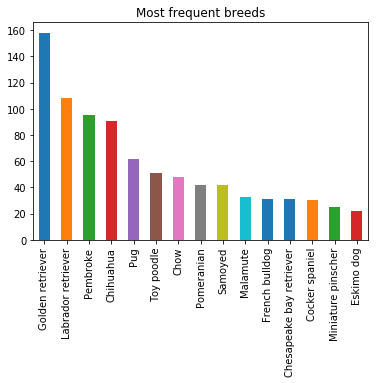

In [67]:
df_clean_breed.best_prediction.value_counts().nlargest(15).plot(kind ='bar')
plt.title('Most frequent breeds');

The most popular breed is obviously golden retriever, followed by labrador retriever, pembroke and chihuahua.

In [68]:
# Insight_2: Breeds with the highest average of retweets
df_clean_retweets = df_clean.groupby('best_prediction')['retweet_count'].mean().sort_values(ascending = False)
df_clean_retweets

best_prediction
Saluki                         24060.000000
Bedlington terrier             21153.166667
French bulldog                 18416.806452
Bouvier des flandres           18032.000000
Afghan hound                   17326.666667
Black-and-tan coonhound        17012.000000
Flat-coated retriever          16791.625000
Irish water spaniel            16400.000000
Leonberg                       14934.333333
English springer               14138.300000
Standard poodle                13912.818182
Samoyed                        13902.523810
Mexican hairless               13590.571429
Cocker spaniel                 13580.400000
Border terrier                 13578.000000
Whippet                        12911.454545
Cardigan                       12840.190476
Great pyrenees                 12456.466667
Golden retriever               12322.367089
Tibetan mastiff                12173.500000
Weimaraner                     11982.750000
Labrador retriever             11801.166667
Lakeland terrier

Although the most popular breed is a golden retriver, the most retweets deserved saluki and Bedlington terrier.

In [69]:
# Insight_3: Favourite and retweet counts by the dog's stage 
df_clean_stages = df_clean.groupby('dog_stage')['retweet_count', 'favorite_count'].sum()
df_clean_stages

,retweet_count,favorite_count
dog_stage,,
doggo,1219452,448919
floofer,92442,34781
multiple,177811,59380
none,14312425,4351592
pupper,1461141,479807
puppo,474806,142427


Unfortunately, there are plenty of ratings without the dog's stage, therefore any conclusion could be disputable. On top, there are some tweets with multiple stages. Taking into account only four "proper single" stages, the winner is pupper, with the highest retweet and favourite counts.

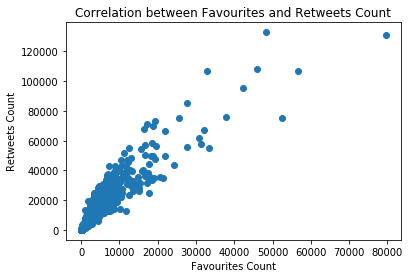

In [70]:
# Visualisation: Correlation between the favorite and retweet count
plt.title('Correlation between Favourites and Retweets Count')
plt.xlabel('Favourites Count')
plt.ylabel('Retweets Count')
plt.scatter(df_clean.favorite_count, df_clean.retweet_count);

The counts have a quite strong positive correlation.

In [71]:
# Insight_4: The dog with the highest number of likes:
max_likes = df_clean['favorite_count'].max()
max_likes

79515

In [72]:
df_clean[df_clean['favorite_count'] == max_likes]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence,favorite_count,retweet_count
775,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13.0,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,...,ice_bear,0.044681,False,whippet,0.018442,True,Labrador retriever,0.825333,79515,131075


In [73]:
df_clean.loc[775, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

The most likes deserved a labrador retriever, a doggo whose name is not known.

In [74]:
# Insight_5: Looking for a few odd values
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,confidence,favorite_count,retweet_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.237101,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02,0.464991,2766.753260,8895.725677
std,6.747816e+16,41.471197,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02,0.339470,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,0.140466,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,0.459130,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,0.776387,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,0.999956,79515.000000,132810.000000


In [75]:
df_clean[(df_clean['rating_numerator'] == 1776)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence,favorite_count,retweet_count
726,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10,Atticus,none,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,...,sunglasses,0.080822,False,sunglass,0.050776,False,Undefined,0.0,2772,5569


In [76]:
df_clean.loc[726, 'jpg_url']

'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'

The rating_numerator 1776 obviously means the year, however, you cannot guess it unless you look at the photo.

In [77]:
df_clean[(df_clean['confidence'] == 0)].sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence,favorite_count,retweet_count
1735,670783437142401025,2015-11-29 01:56:48,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,1.0,10,None,none,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1.0,...,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False,Undefined,0.0,431,872
1487,676098748976615425,2015-12-13 17:57:57,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,3.0,10,None,none,https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg,1.0,...,sandal,0.129086,False,purse,0.081412,False,Undefined,0.0,1623,3279
738,748692773788876800,2016-07-01 01:40:41,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,10.0,10,None,doggo,https://pbs.twimg.com/media/CmPkGhFXEAABO1n.jpg,1.0,...,plow,0.269287,False,oxcart,0.245653,False,Undefined,0.0,1504,4659
785,742528092657332225,2016-06-14 01:24:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,10.0,10,Maxaroni,none,https://pbs.twimg.com/media/Ck39W0JWUAApgnH.jpg,2.0,...,sunglass,0.040291,False,snorkel,0.009333,False,Undefined,0.0,2245,4878
1670,671882082306625538,2015-12-02 02:42:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Batdog. He's sleeping now but when he ...,11.0,10,Batdog,none,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1.0,...,mask,0.021863,False,abaya,0.005479,False,Undefined,0.0,1488,3693
1511,675483430902214656,2015-12-12 01:12:54,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,5.0,10,None,none,https://pbs.twimg.com/media/CV_MmGZU8AAggM6.jpg,1.0,...,terrapin,0.202600,False,loggerhead,0.071122,False,Undefined,0.0,1081,1985
593,771014301343748096,2016-08-31 15:58:28,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,7.0,10,None,none,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1.0,...,doormat,0.111790,False,macaque,0.088925,False,Undefined,0.0,1782,7032
609,767884188863397888,2016-08-23 00:40:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Tito. He's on the lookout. Nobody know...,10.0,10,Tito,none,https://pbs.twimg.com/media/CqgSl4DWcAA-x-o.jpg,3.0,...,cliff,0.157182,False,lakeside,0.048810,False,Undefined,0.0,1634,5309
1297,684567543613382656,2016-01-06 02:49:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Bobby. He doesn't give a damn about pe...,4.0,10,Bobby,none,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1.0,...,llama,0.229145,False,seat_belt,0.209393,False,Undefined,0.0,1418,3312
1802,669571471778410496,2015-11-25 17:40:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's had 13 DUIs. 7/10 that's t...,7.0,10,Keith,none,https://pbs.twimg.com/media/CUrLsI-UsAALfUL.jpg,1.0,...,pickup,0.041259,False,beach_wagon,0.015400,False,Undefined,0.0,1085,1684


In [78]:
df_clean.loc[958, 'jpg_url']

'https://pbs.twimg.com/media/CeHDV73W0AM5Cf8.jpg'

In [79]:
# df_clean[(df_clean['rating_numerator'] == 0)].count()
df_clean[(df_clean['rating_numerator'] == 0) & (df_clean['best_prediction'] == 'Undefined')]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence,favorite_count,retweet_count
756,746906459439529985,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",0.0,10,None,none,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1.0,...,fountain,0.199776,False,space_shuttle,0.064807,False,Undefined,0.0,336,3168


In [80]:
df_clean.loc[756, 'jpg_url']

'https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg'

There is only one zero rating that the best prediction is undefined. Yet again, the answer is hidden in the photo.